<a href="https://colab.research.google.com/github/youdanzh/Transformer-for-Therom-Proving/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import torch as tr
import matplotlib.pyplot as pt
from tqdm.notebook import trange
import numpy as np

In [2]:
import os 

examples = []

for file in os.listdir("smaller_train"):
  filename = os.fsdecode(file)
  #print(filename)
  header = True
  path = "smaller_train/" + filename
  with open(path, "r") as f:
    counter = 0
    clause = ""
    for line in f:
      counter += 1
      if line[0] == "T" and counter == 3:
        clause = line[2:]
      if line[0] in "+-":
        header = False
        label = 0 if line[0] == "-" else 1
      elif not header:
        clause_steps = line[2:] + " & " + clause
        #print(clause_steps)
        examples.append((clause_steps,label))



In [3]:
validation = []
header = True

with open("0005", "r") as f:
  counter = 0
  clause = ""
  for line in f:
    counter += 1
    if line[0] == "T" and counter == 3:
      clause = line[2:]
    if line[0] in "+-":
      header = False
      label = 0 if line[0] == "-" else 1
    elif not header:
      clause_steps = line[2:] + " & " + clause
      #print(clause_steps)
      validation.append((clause_steps.strip(),label))

print(validation)
      
      


[('c= c==> c= cpath f0 cpath f0 c==> c==> cpath f0 c= clocally part cconnected * part cpath_image f0 f1 c= c==> cpath f0 clocally part cconnected * part cpath_image f0 c==> cpath f0 f1 c==> c==> cpath f0 c= clocally part cconnected * part cpath_image f0 f1 c= c==> cpath f0 clocally part cconnected * part cpath_image f0 c==> cpath f0 f1\n & c==> cpath f0 clocally part cconnected * part cpath_image f0', 1), ('c==> cpath f0 c= cpath f0 cT\n & c==> cpath f0 clocally part cconnected * part cpath_image f0', 0), ('c==> clocally part cpath_connected f0 c/\\ clocally part cpath_connected f0 c= clocally part cconnected f0 cT\n & c==> cpath f0 clocally part cconnected * part cpath_image f0', 1), ('c= c==> f0 cT cT\n & c==> cpath f0 clocally part cconnected * part cpath_image f0', 1), ('c= c==> f0 f0 cT\n & c==> cpath f0 clocally part cconnected * part cpath_image f0', 0), ('* / ! c==> c= cpath f0 b0 c==> c==> b0 c= clocally part cconnected * part cpath_image f0 b1 c= c==> cpath f0 clocally part c

In [4]:
len(validation)

12

In [5]:
chrs = "".join([chr(c) for c in range(ord("a"), ord("z"))] + [chr(c) for c in range(ord("A"), ord("Z"))] + ["_"])
print(chrs)

def parse(line):
  tokens = []
  token = ""
  for c in line:
    if c in chrs: token += c
    else:
      tokens.append(token.lstrip())
      token = c
  tokens.append(token.lstrip())
  return tokens

print(parse(examples[0][0]))

abcdefghijklmnopqrstuvwxyABCDEFGHIJKLMNOPQRSTUVWXY_
['c', '=', '=', '>', 'c', '/', '\\', 'creal_ge', 'creal_of_int', 'f', '0', 'creal_of_num', 'cNUMERAL', 'c_', '0', 'c', '/', '\\', 'creal_ge', 'creal_of_int', 'f', '1', 'creal_of_num', 'cNUMERAL', 'c_', '0', 'c', '/', '\\', 'creal_ge', 'creal_of_int', 'f', '2', 'creal_of_num', 'cNUMERAL', 'c_', '0', 'c', '/', '\\', 'creal_ge', 'creal_of_int', 'f', '3', 'creal_of_num', 'cNUMERAL', 'c_', '0', 'c', '/', '\\', 'c', '/', '\\', 'creal_ge', 'creal_add', 'creal_mul', 'creal_neg', 'creal_of_num', 'cNUMERAL', 'cBIT', '1', 'c_', '0', 'creal_of_int', 'f', '2', 'creal_add', 'creal_of_int', 'f', '3', 'creal_neg', 'creal_of_num', 'cNUMERAL', 'cBIT', '1', 'c_', '0', 'creal_of_num', 'cNUMERAL', 'c_', '0', 'c', '=', 'creal_of_int', 'f', '1', 'creal_of_num', 'cNUMERAL', 'c_', '0', 'c', '/', '\\', 'c', '/', '\\', 'creal_ge', 'creal_add', 'creal_mul', 'creal_neg', 'creal_of_num', 'cNUMERAL', 'cBIT', '1', 'c_', '0', 'creal_of_int', 'f', '2', 'creal_add', 'c

In [6]:
all_tokens = set()
for example, label in examples:
  tokens = parse(example) 
  all_tokens |= set(tokens)

for example_2, label_2 in validation:
  tokens = parse(example_2) 
  all_tokens |= set(tokens)


all_tokens = list(all_tokens)
lookup = {token: t for (t, token) in enumerate(all_tokens)}

print(lookup)
for token in all_tokens: print(token)
print(len(all_tokens))


{'3': 0, '': 1, '/': 2, 'c_': 3, 'cT': 4, 'creal_le': 5, 'cinteger': 6, 'cpath_connected': 7, 'cF': 8, 'clocally': 9, '~': 10, 'cNUMERAL': 11, 'creal_lt': 12, 'creal_abs': 13, 'creal_min': 14, 'creal_of_num': 15, 'cint_le': 16, 'creal_pow': 17, '?': 18, 'creal_sub': 19, 'cpath_image': 20, '0': 21, 'creal_gt': 22, 'cSUC': 23, 'part': 24, 'cint_add': 25, '&': 26, '*': 27, '-': 28, '!': 29, '5': 30, 'creal_mul': 31, 'cint_of_num': 32, '>': 33, 'cBIT': 34, 'creal_neg': 35, 'cconnected': 36, '2': 37, '=': 38, '1': 39, 'creal_div': 40, '4': 41, 'creal_max': 42, 'c': 43, 'creal_ge': 44, 'creal_add': 45, '+': 46, 'b': 47, 'f': 48, '<': 49, 'creal_of_int': 50, '6': 51, 'cint_lt': 52, '\\': 53, 'cpath': 54}
3

/
c_
cT
creal_le
cinteger
cpath_connected
cF
clocally
~
cNUMERAL
creal_lt
creal_abs
creal_min
creal_of_num
cint_le
creal_pow
?
creal_sub
cpath_image
0
creal_gt
cSUC
part
cint_add
&
*
-
!
5
creal_mul
cint_of_num
>
cBIT
creal_neg
cconnected
2
=
1
creal_div
4
creal_max
c
creal_ge
creal_add
+


In [7]:
max_len = max([len(parse(example)) for example,label in examples])
print("max_len:", max_len)
embeddings = tr.eye(len(all_tokens))

max_len: 822


In [8]:
"""
Transformer utilities
"""
def embed(seq, max_len, embeddings, offset=0):
    embedded = tr.zeros(max_len, embeddings.shape[1])
    cap = min(len(seq), max_len-offset)
    if cap > 0:
        embedded[offset:offset+cap] = tr.stack(tuple(embeddings[lookup[token]] for token in seq[:cap]))
    return embedded

def Attention(Q, K, V, masked=False):
    dk = Q.shape[1]
    logits = Q @ K.t() / dk**.5
    if masked:
        idx = tr.arange(Q.shape[0])
        logits[idx.unsqueeze(1) < idx] = -tr.inf
    return tr.softmax(logits, dim=1) @ V

class MultiHeadAttention(tr.nn.Module):
    def __init__(self, num_heads, d_model, masked=False, projections=""):
        super(MultiHeadAttention, self).__init__()
        dh = d_model // num_heads
        self.masked = masked
        self.num_heads = num_heads
        self.WQ, self.WK, self.WV = tuple(
            tr.nn.ModuleList([tr.nn.Linear(d_model, dh, bias=False) for i in range(num_heads)])
            if p in projections else [lambda x: x[:,:dh]]*num_heads
            for p in "QKV")
        self.WO = tr.nn.Linear(dh * num_heads, d_model, bias=False) if "O" in projections else lambda x: x
        self.ln = tr.nn.LayerNorm(d_model)
        self.projections = projections

    def forward(self, Q, K, V):
        heads = [
            Attention(self.WQ[i](Q), self.WK[i](K), self.WV[i](V), self.masked)
            for i in range(self.num_heads)]
        out = self.WO(tr.cat(heads, dim=1))
        out += Q # skip connection
        out = self.ln(out) # layer normalization
        return out

# requires d_model - d_embedding >= max_len
def one_hot_positional_encoder(max_len):
    def encode_position(inputs):
        I = tr.eye(max_len)
        return tr.cat((I, inputs), dim=1)
    return encode_position




#BaseLine

In [9]:
class Net(tr.nn.Module):
  def __init__(self, num_blocks, num_heads):
    super(Net, self).__init__()
    d_model = max_len+embeddings.shape[1]
    self.encoder = one_hot_positional_encoder(max_len)
    self.blocks = tr.nn.ModuleList([
      MultiHeadAttention(num_heads, d_model, projections="QKVO")
      for _ in range(num_blocks)
    ])
    self.readout = tr.nn.Linear(d_model, 2)
    
  def forward(self, example):
    x = embed(parse(example), max_len, embeddings)
    x = self.encoder(x)
    for mha in self.blocks:
      x = mha(x, x, x)
    y = self.readout(x).mean(dim=0).unsqueeze(0)
    return y

net = Net(3, 4)
y = net(examples[0][0])
print(y)

tensor([[0.0360, 0.0152]], grad_fn=<UnsqueezeBackward0>)


  0%|          | 0/200 [00:00<?, ?it/s]

 0.7000309228897095
val_acc: 0.5
 0.5354539155960083
val_acc: 0.5833333333333333
 0.41325655579566956
val_acc: 0.6666666666666667
 0.29375624656677246
val_acc: 0.5
 0.8886826634407043
val_acc: 0.5
 0.798474907875061
val_acc: 0.5
 0.6758477091789246
val_acc: 0.5
 0.7087335586547852
val_acc: 0.5
 0.2757274806499481
val_acc: 0.5
 0.7814621329307556
val_acc: 0.5
 0.7420243620872498
val_acc: 0.5


Text(0, 0.5, 'Loss')

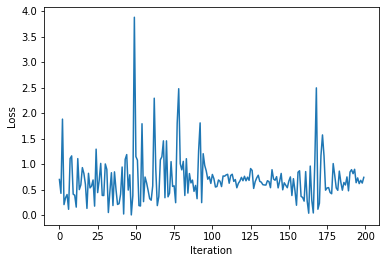

In [10]:
net = Net(2, 4)
xc = tr.nn.CrossEntropyLoss()

opt = tr.optim.Adam(net.parameters(), lr=0.0005)

num_iters = 200
verb_step = 20
train_loss_baseline = []
valid_accu_baseline = []
vloss_baseline = []

for i in trange(num_iters):

    example, label = random.choice(examples)
   # if tr.cuda.is_available():
   #   example, label = example.cuda(), label.cuda()
    logits = net(example)
    loss = xc(logits, tr.tensor([label]))
    train_loss_baseline.append(loss.item())

    opt.zero_grad()
    loss.backward()
    opt.step()
    correct = []

    if i % verb_step == 0 or i == num_iters-1:
      print("", loss.item())
      with tr.no_grad():
        for example_2, label_2 in validation:
          #print(example_2)
          vv_loss = xc(logits,tr.tensor([label_2])) 
          vloss_baseline.append(vv_loss.item())
          #if tr.cuda.is_available():
           #  example_2, label_2 = example_2.cuda(), label_2.cuda()
          logits = net(example_2)
          pred = logits.argmax()
          correct.append(np.absolute(label_2-pred))
        accuracy =1-np.mean(correct)
        print("val_acc:",accuracy)
        valid_accu_baseline.append(accuracy)
        correct = []


pt.plot(train_loss_baseline)
pt.xlabel("Iteration")
pt.ylabel("Loss")
      
              

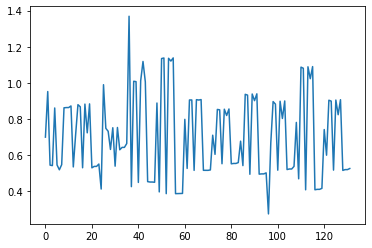

In [29]:
pt.plot(vloss_baseline)

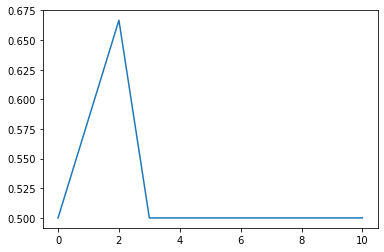

In [11]:
pt.plot(valid_accu_baseline)

#Yehya's implementation

In [12]:
from torch.nn.modules.activation import Sigmoid
class Net(tr.nn.Module):
  def __init__(self, num_blocks, num_heads):
    super(Net, self).__init__()
    d_model = max_len+embeddings.shape[1]
    self.encoder = one_hot_positional_encoder(max_len)
    self.blocks = tr.nn.ModuleList([
      MultiHeadAttention(num_heads, d_model, projections="QKVO")
      for _ in range(num_blocks)
    ])
    self.sigmoid = tr.nn.Sigmoid() 
    
    self.dense = tr.nn.Linear(d_model,d_model)
    self.readout = tr.nn.Linear(d_model, 2)
    
  def forward(self, example):
    x = embed(parse(example), max_len, embeddings)
    x = self.encoder(x)
    for mha in self.blocks:
      x = mha(x, x, x)
    x = self.dense(x)
    y = self.readout(x).mean(dim=0).unsqueeze(0)
    return y

net = Net(3, 4)
y = net(examples[0][0])
print(y)

tensor([[0.0399, 0.0110]], grad_fn=<UnsqueezeBackward0>)


  0%|          | 0/200 [00:00<?, ?it/s]

 0.6922074556350708
val_acc: 0.5
 0.6531774997711182
val_acc: 0.5
 0.5949116349220276
val_acc: 0.5
 0.7623158693313599
val_acc: 0.5
 0.6489866971969604
val_acc: 0.41666666666666663
 0.6791813373565674
val_acc: 0.5
 0.730800986289978
val_acc: 0.5
 0.7242084741592407
val_acc: 0.5833333333333333
 0.6047250032424927
val_acc: 0.5
 0.7427351474761963
val_acc: 0.5
 0.6997230648994446
val_acc: 0.6666666666666667


Text(0, 0.5, 'Loss')

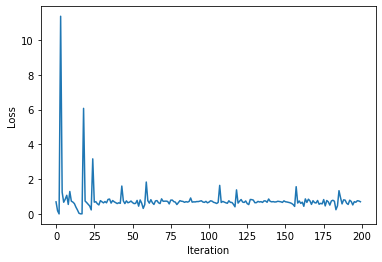

In [13]:
net = Net(2, 4)
xc = tr.nn.CrossEntropyLoss()

opt = tr.optim.NAdam(net.parameters(), lr=0.001)

num_iters = 200
verb_step = 20
train_loss_yehya = []
valid_accu_yehya = []
vloss_yehya = []

for i in trange(num_iters):

    example, label = random.choice(examples)
    logits = net(example)
    loss = xc(logits, tr.tensor([label]))
    train_loss_yehya.append(loss.item())

    opt.zero_grad()
    loss.backward()
    opt.step()
    correct = []
    

    if i % verb_step == 0 or i == num_iters-1:
      print("", loss.item())
      with tr.no_grad():
        for example_2, label_2 in validation:
         # print(example_2)
          
                #if tr.cuda.is_available():
           # example_2, label_2 = example_2.cuda(), label_2.cuda()
          logits = net(example_2)
          vv_loss = xc(logits,tr.tensor([label_2])) 
          pred = logits.argmax()
          correct.append(np.absolute(label_2-pred))
          vloss_yehya.append(vv_loss.item())
        accuracy =1-np.mean(correct)
        print("val_acc:",accuracy)
        valid_accu_yehya.append(accuracy)
        correct = []


pt.plot(train_loss_yehya)
pt.xlabel("Iteration")
pt.ylabel("Loss")
      
              


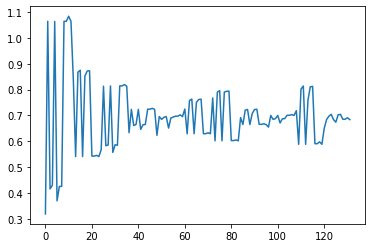

In [21]:
pt.plot(vloss_yehya)
pt.show()

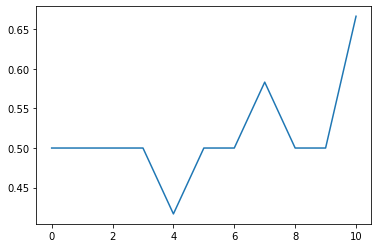

In [22]:
pt.plot(valid_accu_yehya)
pt.show()

#Peter's Approach

In [14]:
class Net(tr.nn.Module):
  def __init__(self, num_blocks, num_heads):
    super(Net, self).__init__()
    d_model = max_len+embeddings.shape[1]
    self.encoder = one_hot_positional_encoder(max_len)
    self.blocks = tr.nn.ModuleList([
      MultiHeadAttention(num_heads, d_model, projections="QKVO")
      for _ in range(num_blocks)
    ])
    self.readout = tr.nn.Linear(d_model, 2)
    
  def forward(self, example):
    x = embed(parse(example), max_len, embeddings)
    x = self.encoder(x)
    for mha in self.blocks:
      x = mha(x, x, x)
    y = self.readout(x).mean(dim=0).unsqueeze(0)
    return y

net = Net(3, 4)
y = net(examples[0][0])
print(y)

tensor([[0.0192, 0.0896]], grad_fn=<UnsqueezeBackward0>)


  0%|          | 0/200 [00:00<?, ?it/s]

 0.6963557600975037
val_acc: 0.5
 2.5313148498535156
val_acc: 0.5
 0.5088530778884888
val_acc: 0.5
 0.16862928867340088
val_acc: 0.5
 0.26996347308158875
val_acc: 0.5
 2.3129448890686035
val_acc: 0.5
 0.15167483687400818
val_acc: 0.5
 0.7445675134658813
val_acc: 0.5
 0.5040772557258606
val_acc: 0.5
 1.0203313827514648
val_acc: 0.5
 0.961155116558075
val_acc: 0.5


Text(0, 0.5, 'Loss')

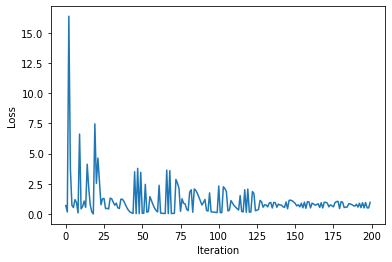

In [15]:
net = Net(4, 8)
xc = tr.nn.CrossEntropyLoss()
val = random.sample(validation,12)



opt = tr.optim.Adam(net.parameters(), lr=0.001)

num_iters = 200
verb_step = 20
train_loss_peter = []
valid_accu_peter =[]
vloss_peter =[]

for i in trange(num_iters):

    example, label = random.choice(examples)
    
    logits = net(example)
    loss = xc(logits, tr.tensor([label]))
    train_loss_peter.append(loss.item())

    opt.zero_grad()
    loss.backward()
    opt.step()
    correct = []
    
    
    
    if i % verb_step == 0 or i == num_iters-1:
        print("", loss.item())
        with tr.no_grad():
            for example_2, label_2 in validation:
               
               logits = net(example_2)
               vv_loss = xc(logits,tr.tensor([label_2]))  
               pred = logits.argmax()
               correct.append(np.absolute(label_2-pred))
               vloss_peter.append(vv_loss.item())

        accuracy =  1 - np.mean(correct)
        print("val_acc:",accuracy)
        valid_accu_peter.append(accuracy)
        
              

#pt.plot(prediction)
pt.plot(train_loss_peter)
pt.xlabel("Iteration")
pt.ylabel("Loss")

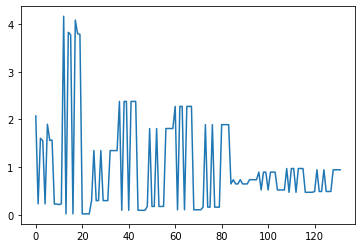

In [18]:
pt.plot(vloss_peter)
pt.show()

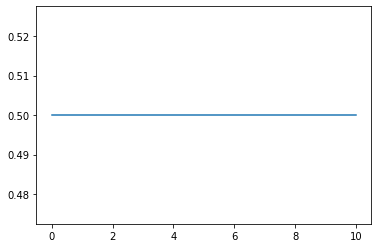

In [19]:
pt.plot(valid_accu_peter)
pt.show()

#Youdan's approach

In [61]:
class Net(tr.nn.Module):
  def __init__(self, num_blocks, num_heads):
    super(Net, self).__init__()
    d_model = max_len+embeddings.shape[1]
    self.conv = tr.nn.Conv1d(max_len,max_len, kernel_size=1)    
    self.encoder = one_hot_positional_encoder(max_len)
    self.lrelu = tr.nn.LeakyReLU()
    self.blocks = tr.nn.ModuleList([
      MultiHeadAttention(num_heads, d_model, projections="QKVO")
      for _ in range(num_blocks)
    ])
    self.dense = tr.nn.Linear(d_model,d_model)
    self.readout =tr.nn.Linear(d_model, 2)
    
    
  def forward(self, example):
    x = embed(parse(example), max_len, embeddings)
    x = self.encoder(x)
   
    for mha in self.blocks:
       x = mha(x, x, x)
    x = self.conv(x)
    x = self.lrelu(x)
    y =self.readout(self.dense(x)).mean(dim=0).unsqueeze(0)
   
    return y

net = Net(2, 4)
print(net(examples[0][0]))

tensor([[-0.0098,  0.0488]], grad_fn=<UnsqueezeBackward0>)


  0%|          | 0/200 [00:00<?, ?it/s]

 0.6934155225753784
val_acc: 0.5
 0.2805428206920624
val_acc: 0.5
 0.04144638031721115
val_acc: 0.5
 0.48963406682014465
val_acc: 0.5
 0.5239839553833008
val_acc: 0.5
 0.3951834738254547
val_acc: 0.5
 0.7379706501960754
val_acc: 0.5
 0.6066507697105408
val_acc: 0.5
 0.6860476732254028
val_acc: 0.5
 0.6896752715110779
val_acc: 0.5
 0.7986747026443481
val_acc: 0.5


Text(0, 0.5, 'Loss')

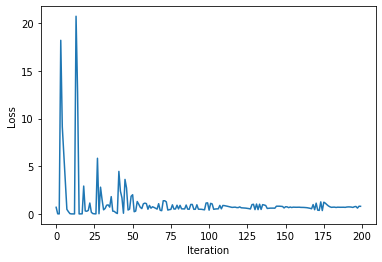

In [63]:
net = Net(4, 8)
xc = tr.nn.CrossEntropyLoss()


opt = tr.optim.Adam(net.parameters(), lr=0.001)

num_iters = 200
verb_step = 20
train_loss_youdan = []
valid_accu_youdan =[]
vloss_youdan = []

for i in trange(num_iters):

    example, label = random.choice(examples)
    
    logits = net(example)
    loss = xc(logits, tr.tensor([label]))
    train_loss_youdan.append(loss.item())

    opt.zero_grad()
    loss.backward()
    opt.step()
    correct = []
    
    
    if i % verb_step == 0 or i == num_iters-1:
        print("", loss.item())
        with tr.no_grad():
            for example_2, label_2 in validation:
               
               logits = net(example_2)
               vv_loss = xc(logits,tr.tensor([label_2]))  
               pred = logits.argmax()
               correct.append(np.absolute(label_2-pred))
               vloss_youdan.append(vv_loss.item())

        accuracy =  1 - np.mean(correct)
        print("val_acc:",accuracy)
        valid_accu_youdan.append(accuracy)
       
        
              

#pt.plot(prediction)
pt.plot(train_loss_youdan)
pt.xlabel("Iteration")
pt.ylabel("Loss")

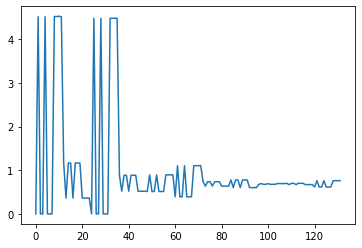

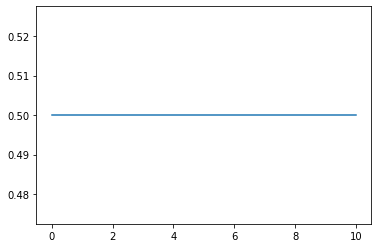

In [64]:
pt.plot(vloss_youdan)
pt.show()
pt.plot(valid_accu_youdan)
pt.show()

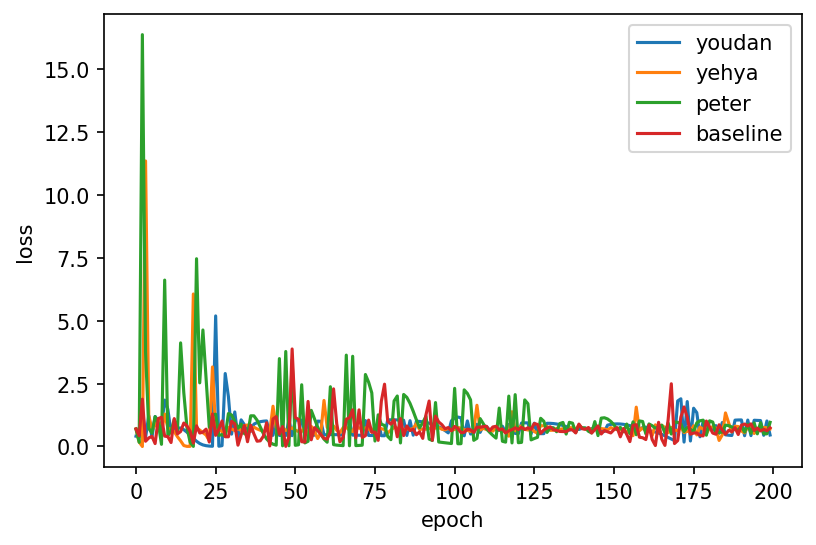

In [42]:

pt.figure(dpi=150)
pt.plot(train_loss_youdan,label="youdan")
pt.plot(train_loss_yehya,label="yehya")
pt.plot(train_loss_peter,label="peter")
pt.plot(train_loss_baseline,label="baseline")
pt.xlabel("epoch")
pt.ylabel("loss")
pt.legend()
pt.show()

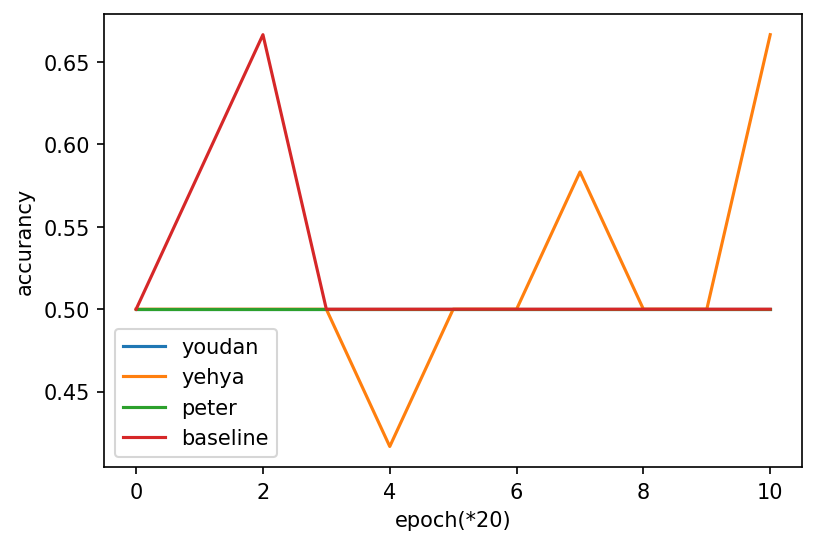

In [43]:
pt.figure(dpi=150)
pt.plot(valid_accu_youdan,label="youdan")
pt.plot(valid_accu_yehya,label="yehya")
pt.plot(valid_accu_peter,label="peter")
pt.plot(valid_accu_baseline,label="baseline")
pt.xlabel("epoch(*20)")
pt.ylabel("accurancy")
pt.legend()
pt.show()

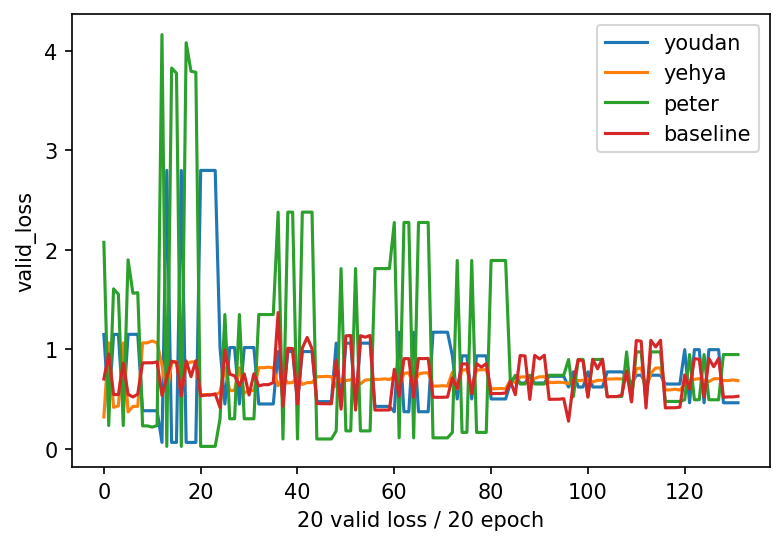

In [44]:
pt.figure(dpi=150)
pt.plot(vloss_youdan,label="youdan")
pt.plot(vloss_yehya,label="yehya")
pt.plot(vloss_peter,label="peter")
pt.plot(vloss_baseline,label="baseline")
pt.xlabel("20 valid loss / 20 epoch")
pt.ylabel("valid_loss")
pt.legend()
pt.show()